# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования
Выполнили студентки группы 1381 Васильева Ольга и Денисова Ольга. Вариант №2.

## Цель работы
Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).     

## Основные теоретические положения
Дискретное преобразование Фурье
Пусть s(t) - дискретный периодический сигнал. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье:
$ Ф(n) = \sum_{k=0}^{N-1} s_{k}*e^{-ik\frac{2*\pi*n}{N}}, n = 0, 1, 2, ..., N -1 $
где n - n-ая частота ω,  равная $ \frac{2 * \pi * n}{N} $


Дифференциальный фильтр первого порядка:
$ \\ y_{n} = s`_{n} = \frac{s_{n+1} - s_{n-1}}{2h}, h = T $

Интегральный фильтр (формула прямоугольников):
$ \\ y_{n+1} = y_{n} + s_{n + \frac{1}{2}}, y_{0} = 0 $

Интегральный фильтр (формула трапеций):
$ \\ y_{n+1} = y_{n} + \frac{s_{n} + s_{n+1}}{2h}, y_{0} = 0, h = T $

Интегральный фильтр (формула симпсона):
$ \\ y_{n+1} = y_{n-1} + \frac{s_{n-1} + 4s_{n} + s_{n+1}}{3}, y_{0} = 0, h = T $


## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos{(\omega_kt+φ_k)}$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\triangle \omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

Был сформирован дискретный сигнал посредством дискретизации с шагом T=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид. Коэффициенты линейной комбинации были нормализованы посредством деления их на сумму полученных случайным образом амплитуд. Дискретная последовательность включает в себя 32 отсчета.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def get_analog(n):
    ws = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi) #частоты от о до пи, с измен шагом w = 0.1*пи
    us = np.random.random(size=11) * 0.5 #начальные фазы от 0 до 0.5
    As = np.random.randint(1, 11, 11) #11 гармоник амплитуды
    x = np.linspace(0, 32, n)
    y = np.zeros(n)
    for w, u, A in zip(ws, us, As): # генерация сигнала
        y += (A * np.cos(w * x + u))
    y = y / np.sum(As) # нормализация коэффициентов линейной комбинации
    return x, y

def get_discrete(y):
    out_x = np.linspace(0, 32, 32)
    out_y = []
    for idx in range(32):
        out_y.append(y[idx * 8])
    return out_x, np.array(out_y)


### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

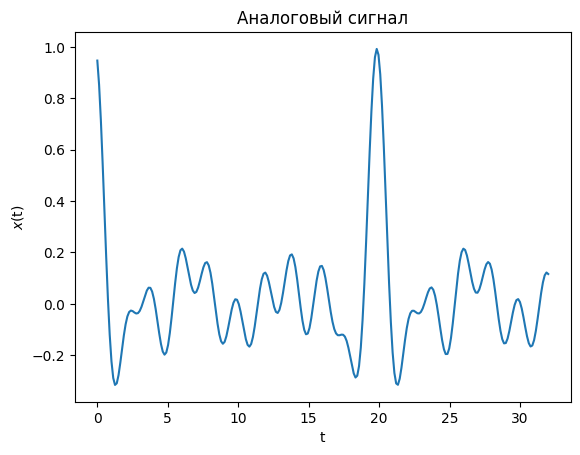

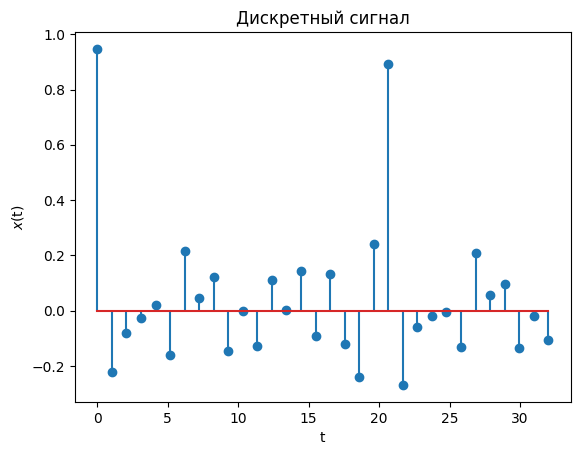

In [3]:
x, y = get_analog(256)
plt.plot(x, y)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Аналоговый сигнал')
plt.show()

x_disc, y_disc = get_discrete(y)
plt.stem(x_disc, y_disc)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал')
plt.show()


### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Представим дискретный сигнал в виде функции от времени:<br>
$ s(t) = \sum_{k=-\infty}^\infty{x_k\delta (t-k)}$ <br>
Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$: <br>
$ S(\omega) = \sum_{k=-\infty}^\infty{x_ke^{-i\omega k}}$ <br>
С другой стороны, представим дискретный сигнал в виде: <br>
$ s_d(t) = \sum_{k=-\infty}^\infty{s(t)\delta (t-kT)}$ <br>
Вынесем $ s(t) $ за знак суммы: <br>
$ s_d(t) = s(t)\sum_{k=-\infty}^\infty{\delta (t-kT)}$ <br>
Сумма может быть представлена комплексным рядом Фурье: <br>
$ \sum_{k=-\infty}^\infty{\delta (t-kT)} = \sum_{k=-\infty}^\infty{c_ke^{i\omega_kt}}$ <br>
где $ \omega_k = \frac{2\pi k}{T}; c_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2}{\delta (t)e^{-i\omega_k t}dt} = \frac{1}{T} $ <br>
Таким образом дискретный сигнал может быть записан в виде: <br>
$ s_d(t) = \frac{1}{T} \sum_{k=-\infty}^\infty{s(t)e*{i\omega_k t}}$, а его спектр <br>
$ S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^\infty{S(\omega - \frac{2\pi k}{T})}$

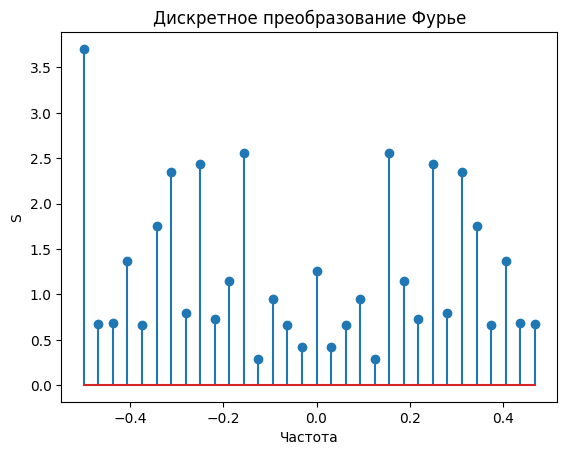

In [4]:
from scipy.fftpack import fft, fftfreq

yf = fft(y_disc)
xf = fftfreq(32, 1)
plt.stem(xf, np.abs(yf))
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Дискретное преобразование Фурье')
plt.show()


Спектр сигнала обладает симметрией относительно нулевой частоты, так как он состоит из суммы синусоидальных компонент. Это означает, что каждая частота в сигнале представлена своей амплитудой, а сам спектр повторяется через равные интервалы, что делает его периодическим с периодом 1.

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega) $– передаточной функции (частотной характеристики) фильтра.

Формулы передаточной функции для фильтра для 5 и 9 точек соответственно. <br>
$ H(\omega)  = \frac{1}{5}(1 + 2\cos{(\omega)} + 2\cos{(2\omega)})$ <br>
$ H(\omega)  = \frac{1}{7}(1 + 2\cos{(\omega)} + 2\cos{(2\omega)} + 2\cos{(3\omega)} + 2\cos{(4\omega)})$

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

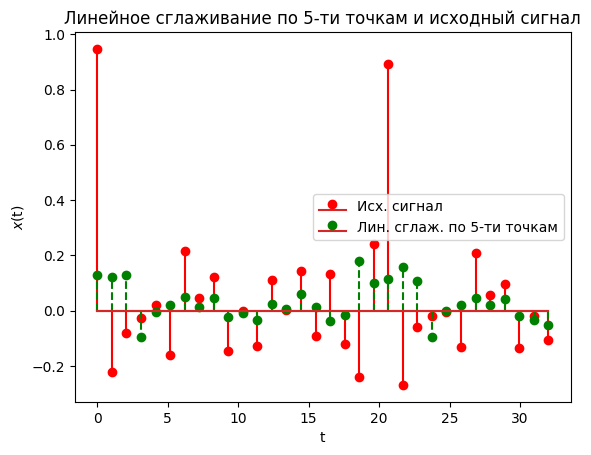

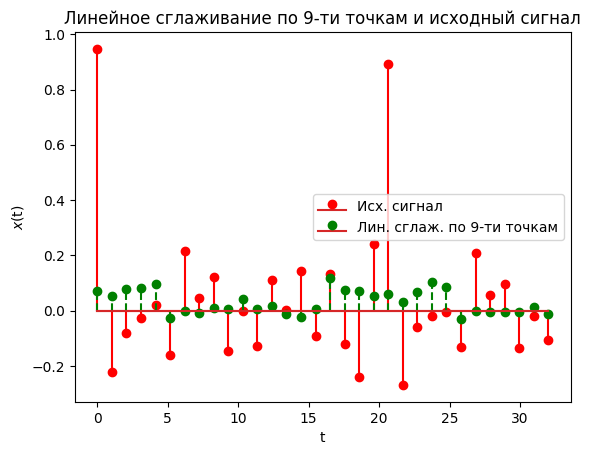

In [5]:
lin_avg_5 = np.convolve(y_disc, np.ones(5), 'same') / 5
lin_avg_9 = np.convolve(y_disc, np.ones(9), 'same') / 9

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, lin_avg_5, 'g--', markerfmt='go', label='Лин. сглаж. по 5-ти точкам')
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.legend()
plt.title('Линейное сглаживание по 5-ти точкам и исходный сигнал')
plt.show()

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, lin_avg_9, 'g--', markerfmt='go', label='Лин. сглаж. по 9-ти точкам')
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.legend()
plt.title('Линейное сглаживание по 9-ти точкам и исходный сигнал')
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

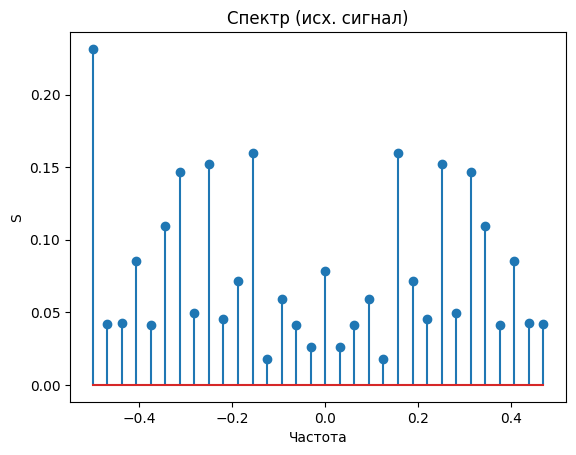

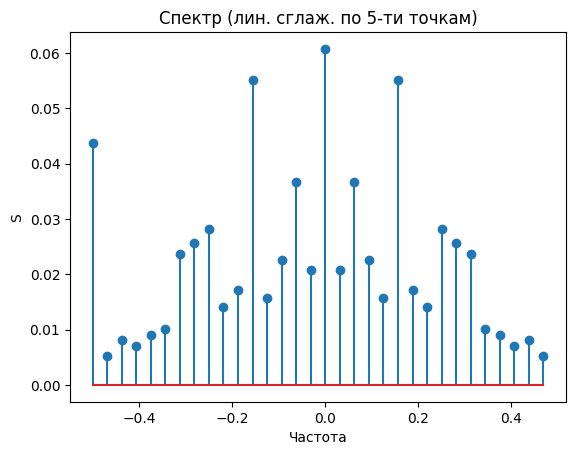

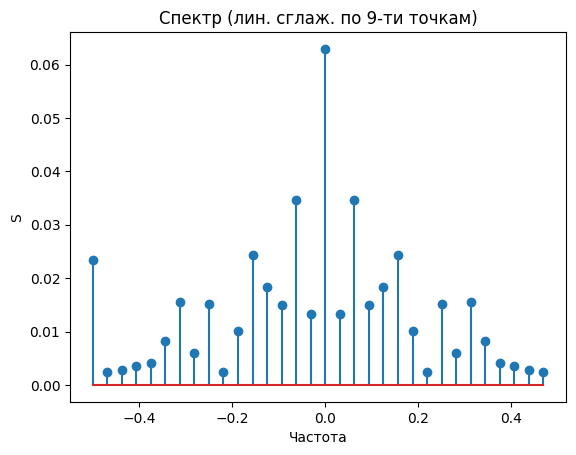

In [6]:
f = fft(y_disc)
f = 2 * np.abs(f) / len(f)
f_5 = fft(lin_avg_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(lin_avg_9)
f_9 = 2 * np.abs(f_9) / len(f_9)

plt.stem(xf, f)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (исх. сигнал)')
plt.show()

plt.stem(xf, f_5)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (лин. сглаж. по 5-ти точкам)')
plt.show()

plt.stem(xf, f_9)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (лин. сглаж. по 9-ти точкам)')
plt.show()


На спектре заметно, что без затухания проходит только постоянный сигнал (с частотой, равной нулю). По мере увеличения количества точек диапазон пропускания сужается.

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

В результате фильтрации амплитуды сигналов подавляются, это становится более заметно при отдалении от нуля дальше от нуля. При увеличении количества точек спектр сильнее сглаживается, то есть происходит более сильное подавление более высоких частот. Полученный результат соответствует значениям $ H(\omega) $, полученным в предыдущей практической работе.

### Задание 8
Повторить п. 4–7 для следующих фильтров: <br>
a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.<br>
b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).


a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка. <br>
Передаточная функция имеет вид:<br>
$ H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2} = i\sin{(\omega)} $ <br>


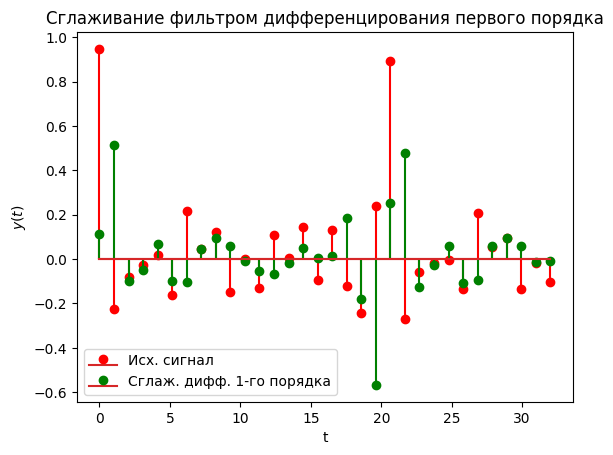

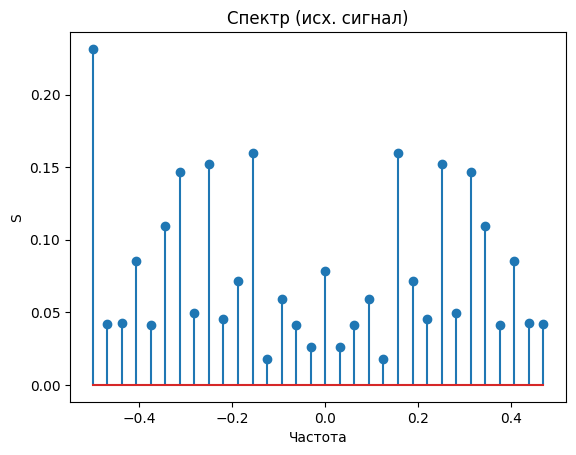

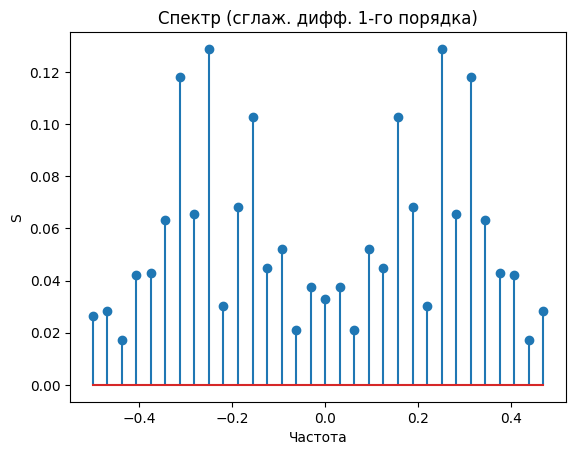

In [7]:
diff_avg = np.convolve(y_disc, np.array([-1, 0, 1]), 'same') / 2

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, diff_avg, 'g', markerfmt='go', label='Сглаж. дифф. 1-го порядка')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title('Сглаживание фильтром дифференцирования первого порядка')
plt.show()


xf = fftfreq(32, 1)
f = fft(y_disc)
f = 2 * np.abs(f) / len(f)
f_1 = fft(diff_avg)
f_1 = 2 * np.abs(f_1) / len(f_1)

plt.stem(xf, f)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (исх. сигнал)')
plt.show()


plt.stem(xf, f_1)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (сглаж. дифф. 1-го порядка)')

plt.show()


На данных последних графиках видно, что сильнее подавляются низкие частоты, другие частоты также подавляются но значительно слабее.

b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона). <br>

Передаточная функция для рекурсивного фильтра, соответствующего численному интегрированию прямоугольников: <br>
$H(\omega) = \frac{e^{0.5i\omega}}{e^{i\omega} - 1} = \frac{1}{2i\sin{(\frac{\omega}{2})}} $ <br>

Передаточная функция для рекурсивного фильтра, соответствующего численному интегрированию трапеций: <br>
$H(\omega) = \frac{e^{i\omega} + 1}{2(e^{i\omega} - 1)} = \frac{\cos{(\frac{\omega}{2})}}{2i\sin{(\frac{\omega}{2})}} $ <br>

Передаточная функция для рекурсивного фильтра, соответствующего численному интегрированию по формуле Симпсона: <br>
$H(\omega) = \frac{e^{-i\omega} + 4+ e^{i\omega}}{3(e^{i\omega} - e^{-i\omega})} = \frac{\cos{(\omega)} + 2}{3i\sin{(\omega)}} $ <br>

In [51]:

def rect(orig):
    Y = []
    for i in range(0, len(orig)):
        Y.append(orig[i] / 2)
    return Y



def trap(orig):
    Y = [0]
    for i in range(1, len(orig) - 1):
        Y.append((orig[i-1] + orig[i + 1]))
    Y.append(orig[-1])
    return Y

def simpson(orig):
    Y = [orig[0]]
    for i in range(1, len(orig) - 1):
        Y.append(1/3 * (orig[i-1]  + 4*orig[i] + orig[i+1]))
    Y.append(orig[-1])
    return Y





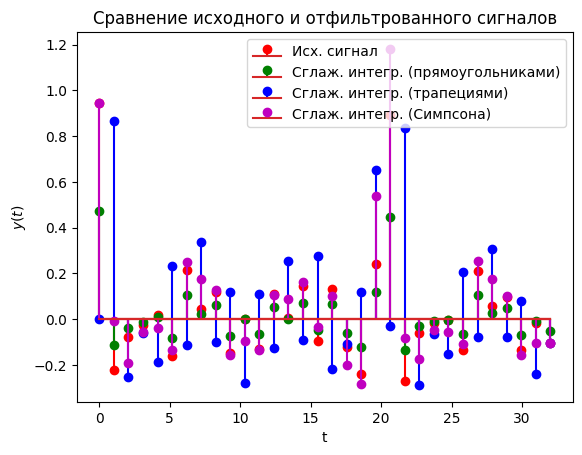

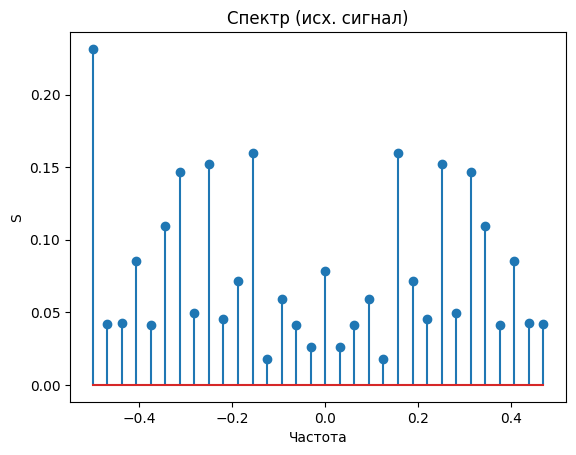

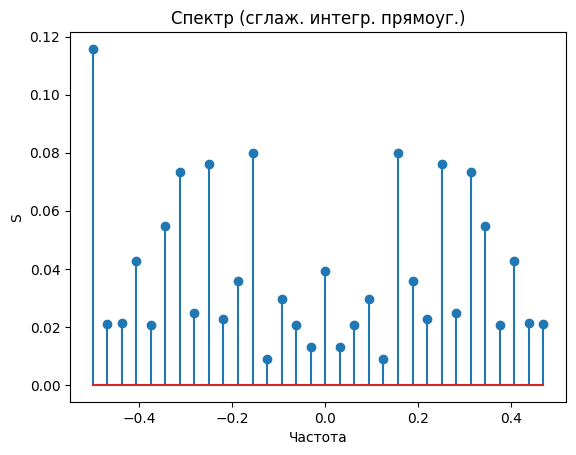

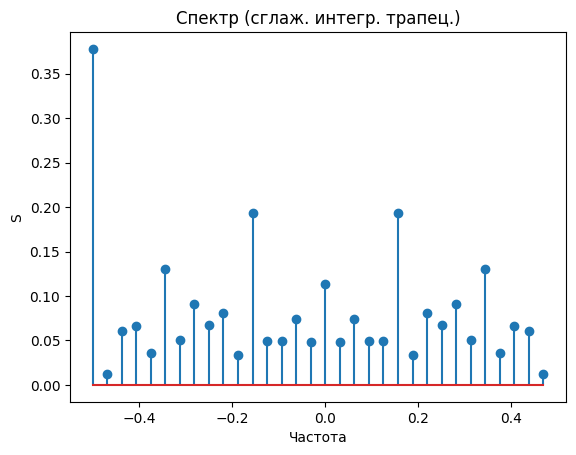

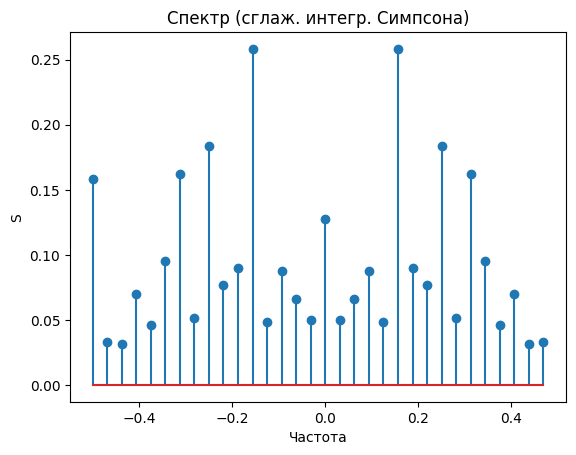

In [52]:
y_rect = rect(y_disc)
y_trap = trap(y_disc)
y_simps = simpson(y_disc)

plt.stem(x_disc, y_disc, 'r', markerfmt='ro', label='Исх. сигнал')
plt.stem(x_disc, y_rect, 'g', markerfmt='go', label='Сглаж. интегр. (прямоугольниками)')
plt.stem(x_disc, y_trap, 'b', markerfmt='bo', label='Сглаж. интегр. (трапециями)')
plt.stem(x_disc, y_simps, 'm', markerfmt='mo', label='Сглаж. интегр. (Симпсона)')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title('Сравнение исходного и отфильтрованного сигналов')
plt.show()

xf = fftfreq(32, 1)
f = fft(y_disc)
f = 2 * np.abs(f) / len(f)
f_rect = fft(y_rect)
f_rect = 2 * np.abs(f_rect) / len(f_rect)
f_trap = fft(y_trap)
f_trap = 2 * np.abs(f_trap) / len(f_trap)
f_simps = fft(y_simps)
f_simps = 2 * np.abs(f_simps) / len(f_simps)

plt.stem(xf, f)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (исх. сигнал)')
plt.show()

plt.stem(xf, f_rect)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (сглаж. интегр. прямоуг.)')
plt.show()

plt.stem(xf, f_trap)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (сглаж. интегр. трапец.)')
plt.show()
    
plt.stem(xf, f_simps)
plt.ylabel(r'S')
plt.xlabel('Частота')
plt.title('Спектр (сглаж. интегр. Симпсона)')
plt.show()


Из графиков спектров интегральных фильтров можем заметить общую характеристику:
подавляются высокие частоты, а низкие усиливаются, это связано со свойствами интеграла: низкочастотные сигналы не успевают измениться настолько, чтобы сумма их значений на всём периоде стала убывать.

## Выводы
В результате выполнения практической работы былы выполнены следующие задачи:
1) при помощи дискретизации непрерывного сигнала в виде линейной комбинации косинусоид вида A_k cos(ω_k t+φ_k), для которых были случайно сгенерированы коэффициенты был сформирован дискретный сигнал
2) Для сформированного дискретного сигнала с помощью преобразования Фурье был построен дискретный спектр
3) Для дискретного сигнала были применены следующие сглаживания:
	- линейное по 5-ти и 9-ти точками
	- полиномомом 2-ой степени по 5-ти и 9-ти точками
	- полиномомом 4-ой степени по 7-ти и 11-ти точками
4) Для сглаженных сигналов также было применено преобразование Фурье для нахождения дискретного спектра сглаженного сигнала
5) Также для дискретного сигнала были применены следующие фильтры:
	- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка
	- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона)

